# Backpropagation Lab





In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except for the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 10000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [2]:
#Iris with no regularization
# Split data into training and test subsets

irisData = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(irisData[0])
irisData_encoded_df = iris_df.apply(LabelEncoder().fit_transform)
data = irisData_encoded_df.iloc[:, :-1].values
targets = irisData_encoded_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=1)

irisMLP = MLPClassifier(
    hidden_layer_sizes = [64],
    activation = 'logistic',
    solver = 'sgd',
    alpha = 0,
    batch_size = 1,
    learning_rate_init = 0.01,
    shuffle = True,
    momentum = 0, 
    n_iter_no_change = 50,
    max_iter = 10000
    )

irisMLP.fit(X_train, y_train)
trainScore = irisMLP.score(X_train,y_train)
testScore = irisMLP.score(X_test, y_test)
iterations = irisMLP.n_iter_
testProba = irisMLP.predict_proba(X_test)

print(trainScore)
print(testScore)
print(iterations)
print(testProba)

0.9666666666666667
0.9
351
[[9.99978508e-01 2.14918340e-05 1.06042211e-17]
 [4.66456359e-03 9.94638789e-01 6.96647264e-04]
 [5.37509045e-04 9.98540724e-01 9.21766764e-04]
 [9.99995522e-01 4.47815953e-06 3.69445619e-16]
 [3.43861064e-04 9.94392207e-02 9.00216918e-01]
 [4.09020924e-03 8.66333774e-01 1.29576017e-01]
 [1.95407575e-04 8.76222078e-02 9.12182385e-01]
 [9.99997615e-01 2.38515574e-06 3.19469036e-14]
 [9.99996185e-01 3.81458820e-06 6.82953189e-14]
 [7.75349911e-05 2.44025227e-02 9.75519942e-01]
 [2.08225926e-03 6.31554366e-01 3.66363375e-01]
 [9.99993958e-01 6.04203146e-06 4.78028964e-15]
 [7.90329863e-05 2.60414547e-02 9.73879512e-01]
 [2.61982687e-03 9.74639280e-01 2.27408928e-02]
 [1.23598373e-03 4.11138299e-01 5.87625717e-01]
 [9.99999532e-01 4.67723966e-07 2.45966348e-14]
 [1.06215557e-03 9.83182738e-01 1.57551066e-02]
 [3.76786372e-03 6.19754573e-01 3.76477564e-01]
 [9.99905167e-01 9.48326814e-05 2.25303930e-15]
 [9.99986503e-01 1.34972073e-05 3.38135120e-16]
 [1.44354359e

#### Discussion
In the markdown cell below, write about your experience training the MLP classifier. Things to cover in your discussion: How long did it take? What was your accuracy on the training set? What was your accuracy on the testing set? Do you see any evidence of overfitting? If so, what could be done to reduce the effects of overfitting?

The training of my MLP classifier took only 4.7 seconds, the training score of my MLP classifier was .975, and the test score of my MLP was .966.
However, when I reran the training, it took only 2.5 seconds to train, the training score was .933, and the test score was .867.
Additionally, the softmax values for this fit MLP are very much [99.999%, ~0%, 0%], which means the algorithm is almost perfectly confident that it is correct, even though it's accuracy is lower.
This is pretty high evidence of overfit since the test accuracy is much lower than the training accuracy. 
Average iterations would be about 220 or so. The fastest I saw was 135 and the slowest was about 350.

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but this time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

0.9809523809523809
0.9666666666666667
58


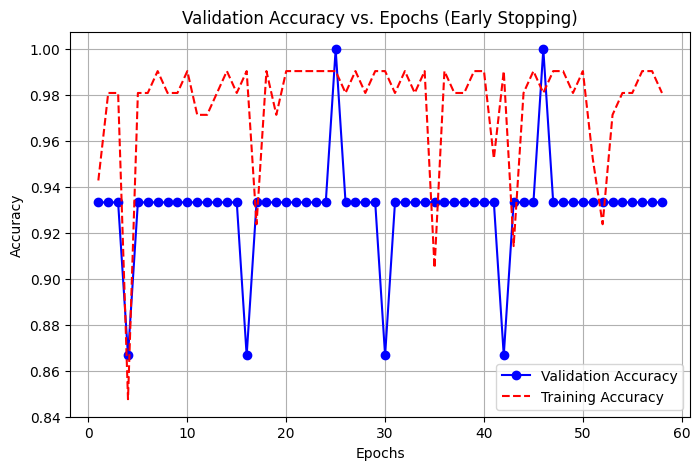

In [73]:
#Iris with early stopping and validation scores graph
irisData = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(irisData[0])
irisData_encoded_df = iris_df.apply(LabelEncoder().fit_transform)
data = irisData_encoded_df.iloc[:, :-1].values
targets = irisData_encoded_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

irisMLP = MLPClassifier(
    hidden_layer_sizes = [64],
    activation = 'logistic',
    solver = 'sgd',
    alpha = 0,
    batch_size = 1,
    learning_rate_init = 0.01,
    shuffle = True,
    momentum = 0, 
    n_iter_no_change = 50,
    max_iter = 10000,
    early_stopping = False,
    warm_start=True
    )

epochs = 150
train_accs = []
val_accs = []
iterations = 0
for epoch in range(58):
    irisMLP.fit(X_train, y_train)
    iterations += 1
    
    train_acc = accuracy_score(y_train, irisMLP.predict(X_train))
    val_acc = accuracy_score(y_val, irisMLP.predict(X_val))
    
    train_accs.append(train_acc)
    val_accs.append(val_acc)

irisMLP.fit(X_train, y_train)
trainScore = irisMLP.score(X_train,y_train)
testScore = irisMLP.score(X_test, y_test)
testProba = irisMLP.predict_proba(X_test)

print(trainScore)
print(testScore)
print(iterations)
# print(testProba)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(val_accs) + 1), val_accs, label="Validation Accuracy", color='blue', marker='o')
plt.plot(range(1, len(train_accs) + 1), train_accs, label="Training Accuracy", color='red', linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy vs. Epochs (Early Stopping)")
plt.legend()
plt.grid(True)
plt.show()

#### Discussion
Report on the average number of iterations until convergence. What is the effect of the use of the validation set and early stopping on training set accuracy and testing set accuracy? What do you attribute the performance change to? What do you see in the validation scores graph?

The average number of iterations dropped to almost 50! The highest I saw was 80 iterations over about 20 trail runs. It seems that the effect of early stopping by using the validation set is that the accuracy of the test set is higher than the accuracy of the test set without stopping early. It also maintains that high accuracy on the training set. Probably because the training set is so small, the accuracy of the MLP on the training set is still really high, but the accuracy of the MLP on the test data is lower. In conclusion, I think that this MLP is struggling to generalize because the data set is so small.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

In [74]:
#Iris with Loss Regularization

irisData = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(irisData[0])
irisData_encoded_df = iris_df.apply(LabelEncoder().fit_transform)
data = irisData_encoded_df.iloc[:, :-1].values
targets = irisData_encoded_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=1)

alphaVal = 0.0001

irisMLP = MLPClassifier(
    hidden_layer_sizes = [64],
    activation = 'logistic',
    solver = 'sgd',
    alpha = alphaVal,
    batch_size = 1,
    learning_rate_init = 0.01,
    shuffle = True,
    momentum = 0, 
    n_iter_no_change = 50,
    max_iter = 10000
    )

irisMLP.fit(X_train, y_train)
iterations = irisMLP.n_iter_
trainScore = round(irisMLP.score(X_train, y_train)*100, 2)
testScore = round(irisMLP.score(X_test, y_test)*100, 2)
bestLossValue = round(irisMLP.best_loss_*100, 3)

print(alphaVal)
print(iterations)
print(trainScore)
print(testScore)
print(bestLossValue)

0.0001
261
97.5
96.67
7.695


| alphaValue | iterations | trainScore | testScore | bestLossValue |
|------------|------------|------------|-----------|---------------|
| 0          | 155        | 93.33      | 93.33     | 10.258        |
| 0.00001    | 303        | 97.5       | 96.67     | 7.103         |
| 0.0001     | 169        | 98.33      | 100       | 10.219        |
| 0.001      | 173        | 97.5       | 93.33     | 12.117        |
| 0.01       | 370        | 96.67      | 96.67     | 19.965        |
| 0.1        | 96         | 94.17      | 86.67     | 54.889        |
| 1          | 62         | 69.17      | 56.67     | 103.605       |

#### Discussion
Write about which regularization method gave you the best results and why you think that happened. Also compare: no regularization, early stopping, and L2 loss regularization.

I think that our alphaValue of 0.0001 gave us the best results. I think these results are the best because it completed the training in almost half of the iterations of 0.00001, and did not overfit. I think its possible that 0.00001 began to overfit because the number of iterations was high and the test score was lower than the train score, meanwhile for 0.0001 the test score was higher.

For this data set in particular, I believe that the L2 regulation was the best method to train the data set, because according to the lab, early stopping has a lower effect on smaller datasets and as we discussed earlier, no regularization leads to consistent overfitting of the data.

## 2 Hyperparameters 
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum. 

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great examples for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

In [ ]:
irisData = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(irisData[0])
irisData_encoded_df = iris_df.apply(LabelEncoder().fit_transform)
data1 = irisData_encoded_df.iloc[:, :-1].values
targets1 = irisData_encoded_df.iloc[:, -1].values

vowelsData = arff.loadarff('vowels.arff')
vowels_df = pd.DataFrame(vowelsData[0])
vowelsData_encoded_df = vowels_df.apply(LabelEncoder().fit_transform)
data2 = vowelsData_encoded_df.iloc[:, :-1].values
targets2 = vowelsData_encoded_df.iloc[:, -1].values

def baseline_accuracy(targets):
    unique, counts = np.unique(targets, return_counts=True)
    return max(counts) / sum(counts)

iris_baseline = round(baseline_accuracy(targets1)*100, 2)
vowel_baseline = round(baseline_accuracy(targets2)*100, 2)

X_train1, X_test1, y_train1, y_test1 = train_test_split(data1, targets1, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, targets2, test_size=0.2, random_state=1)

irisMLP = MLPClassifier(
    hidden_layer_sizes=[64],
    activation='logistic',
    solver='sgd',
    alpha=0.0001,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=50,
    max_iter=10000,
    early_stopping=True,
    validation_fraction=0.125
)

irisMLP.fit(X_train1, y_train1)
iris_train_acc = round(accuracy_score(y_train1, irisMLP.predict(X_train1))*100, 2)
iris_test_acc = round(accuracy_score(y_test1, irisMLP.predict(X_test1))*100, 2)

print("irisMLP")
print(iris_baseline)
print(iris_train_acc)
print(iris_test_acc)

vowelMLP = MLPClassifier(
    hidden_layer_sizes=[128],
    activation='logistic',
    solver='sgd',
    alpha=0.0001,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=50,
    max_iter=10000,
    early_stopping=True,
    validation_fraction=0.125
)

vowelMLP.fit(X_train2, y_train2)
vowel_train_acc = round(accuracy_score(y_train2, vowelMLP.predict(X_train2))*100, 2)
vowel_test_acc = round(accuracy_score(y_test2, vowelMLP.predict(X_test2))*100, 2)

print("vowelMLP")
print(vowel_baseline)
print(vowel_train_acc)
print(vowel_test_acc)

irisMLP
33.33
92.5
76.67
vowelMLP
9.09
10.1
5.05


Base Accuracy for the Iris Dataset: 1/3

Base Accuracy for the Vowel Dataset: 1/11

The Vowel Dataset  will have much lower accuracy than the iris dataset because the data itself if much more complex. There are 3 non numerical features, and 9 numerical features, as well as 11 distict classes that the data could potentially target. I think that dropping the non numerical features would likely be a good place to start in increasing accuracy, since they are context features and the algorithm won't be interested in context.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model more learning time.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [ ]:
# Train with different learning rates
vowelsData = arff.loadarff('vowels.arff')
vowels_df = pd.DataFrame(vowelsData[0])
vowels_df = vowels_df.drop(columns = ['Train or Test', 'Speaker Number', 'Sex'])
vowelsData_encoded_df = vowels_df.apply(LabelEncoder().fit_transform)
data2 = vowelsData_encoded_df.iloc[:, :-1].values
targets2 = vowelsData_encoded_df.iloc[:, -1].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, targets2, test_size=0.25, random_state=1)

vowelMLP = MLPClassifier(
    hidden_layer_sizes=[20],
    activation='logistic',
    learning_rate_init=.0001,
    n_iter_no_change=50,
    max_iter=10000,
    verbose=False
)

vowelMLP.fit(X_train2, y_train2)
vowel_train_acc = round(accuracy_score(y_train2, vowelMLP.predict(X_train2))*100, 2)
vowel_test_acc = round(accuracy_score(y_test2, vowelMLP.predict(X_test2))*100, 2)

print("vowelMLP")
print(vowelMLP.n_iter_)
print(vowel_train_acc)
print(vowel_test_acc)


vowelMLP
9522
82.35
67.34


| Learning Rate | # Epochs | Final Training Set Accuracy | Final Test Set Accuracy |
|---------------|----------|-----------------------------|-------------------------|
| .0001         | 9310     | 82.08                       | 71.77                   |
| .001          | 2247     | 88.41                       | 69.35                   |
| .01           | 271      | 71.16                       | 68.15                   |
| .1            | 55       | 8.89                        | 12.5                    |
| 1             | 76       | 9.97                        | 6.45                    |
| 10            | 65       | 8.36                        | 11.29                   |

#### Discussion
Discuss your table and the effect of different learning rates on both training time and accuracy

In my MLP, I set n_iter_no_change to 50, so the minimum number of iterations will be 50.

By looking at the table, we can see that there is a pretty distint impact of learning rate on the # of epochs completed. If the learning rate is 0.1 or higher, Then we only get a few epochs before the MLP converges. The accuracy of the MLP is also quite abysmal. Sometimes even going lower than the base accuracy of the dataset. However, as we decrease the learning rate by factors of 10, we can see that the number of Epochs increases by a lot as well, but the accuracy comparatively skyrockets. This MLP seems to be capped at around 70% accuracy, but if we decrease the learning rate further, we approach my max_iter value of 10000. Before we reach 10000, however, it seems that the MLP begins to overfit again, so I would choose a learning rate of 0.01 for this dataset.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy. 
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [ ]:
# Train with different numbers of hidden nodes
vowelsData = arff.loadarff('vowels.arff')
vowels_df = pd.DataFrame(vowelsData[0])
vowels_df = vowels_df.drop(columns = ['Train or Test', 'Speaker Number', 'Sex'])
vowelsData_encoded_df = vowels_df.apply(LabelEncoder().fit_transform)
data2 = vowelsData_encoded_df.iloc[:, :-1].values
targets2 = vowelsData_encoded_df.iloc[:, -1].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, targets2, test_size=0.25, random_state=1)

vowelMLP = MLPClassifier(
    hidden_layer_sizes=[64],
    activation='logistic',
    learning_rate_init=.01,
    n_iter_no_change=50,
    max_iter=10000,
    verbose=False
)

vowelMLP.fit(X_train2, y_train2)
vowel_train_acc = round(accuracy_score(y_train2, vowelMLP.predict(X_train2))*100, 2)
vowel_test_acc = round(accuracy_score(y_test2, vowelMLP.predict(X_test2))*100, 2)

print("vowelMLP")
print(vowelMLP.n_iter_)
print(vowel_train_acc)
print(vowel_test_acc)

vowelMLP
185
81.81
75.81


| Hidden Nodes | # Epochs | Final Training Set Accuracy | Final Test Set Accuracy |
|--------------|----------|-----------------------------|-------------------------|
| 1            | 62       | 9.97                        | 6.45                    |
| 2            | 281      | 18.6                        | 14.52                   |
| 4            | 256      | 34.1                        | 33.87                   |
| 8            | 416      | 57.41                       | 57.66                   |
| 16           | 276      | 69.54                       | 69.35                   |
| 32           | 491      | 80.73                       | 74.6                    |
| 64           | 284      | 89.35                       | 87.1                    |
| 200          | 167      | 85.71                       | 81.85                   |
| 1000         | 118      | 86.25                       | 85.89                   |
| 10000        | 101      | 54.85                       | 59.27                   |

#### Discussion
Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy

If we look at the table, we can see that as the number of hidden nodes increases, that the final accuracy of the dataset also increases! It also seems that the accuracy of the Training Set corresponds with the accuracy of the Test set, which is a really good sign! However, even though the # epochs does not increase, the amount of time increases by a ton. The 10000 MLP took 65.2 seconds to train, which is significantly more than any other, while also losing a significant amount of accuracy.

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [ ]:
# Train with different momentum values
vowelsData = arff.loadarff('vowels.arff')
vowels_df = pd.DataFrame(vowelsData[0])
vowels_df = vowels_df.drop(columns = ['Train or Test', 'Speaker Number', 'Sex'])
vowelsData_encoded_df = vowels_df.apply(LabelEncoder().fit_transform)
data2 = vowelsData_encoded_df.iloc[:, :-1].values
targets2 = vowelsData_encoded_df.iloc[:, -1].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, targets2, test_size=0.25, random_state=1)

momentum_var = 0.2

vowelMLP = MLPClassifier(
    hidden_layer_sizes=[96],
    momentum=momentum_var,
    activation='logistic',
    learning_rate_init=.01,
    n_iter_no_change=50,
    max_iter=10000,
    verbose=False
)

vowelMLP.fit(X_train2, y_train2)
vowel_train_acc = round(accuracy_score(y_train2, vowelMLP.predict(X_train2))*100, 2)
vowel_test_acc = round(accuracy_score(y_test2, vowelMLP.predict(X_test2))*100, 2)

print("vowelMLP")
print(momentum_var)
print(vowelMLP.n_iter_)
print(vowel_train_acc)
print(vowel_test_acc)

vowelMLP
0.2
350
90.03
88.71


| Momentum | # Epochs | Final Training Set Accuracy | Final Test Set Accuracy |
|----------|----------|-----------------------------|-------------------------|
| 0        | 294      | 86.79                       | 77.82                   |
| 0.2      | 460      | 89.49                       | 85.89                   |
| 0.4      | 104      | 85.71                       | 81.05                   |
| 0.6      | 220      | 84.64                       | 85.08                   |
| 0.8      | 122      | 83.59                       | 80.24                   |
| 1        | 288      | 86.93                       | 82.66                   |

#### Discussion
Discuss your table and the effect of momentum on both training time and accuracy

Momentum seems to have no distiguishable effect on the training time in terms of # of epochs for my MLP. In general though, high momentum can help a MLP converge faster, while low momentum can cause a MLP to converge slower. This is very useful for gradient descent, where a plateau or a local minimum can halt the progress of our MLP. Higher momentum can help a learning algorithm get out of a minimum and go down a nearby slope. Potentially the vowel dataset is very clean, meaning that the MLP converges easily without getting caught in those minimums. 

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html) 
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will be too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not blindly assume that a tool will get you the results you expect, and that you may need to consider multiple approaches.

In [ ]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.
vowelsData = arff.loadarff('vowels.arff')
vowels_df = pd.DataFrame(vowelsData[0])
vowels_df = vowels_df.drop(columns = ['Train or Test', 'Speaker Number', 'Sex'])
vowelsData_encoded_df = vowels_df.apply(LabelEncoder().fit_transform)
data2 = vowelsData_encoded_df.iloc[:, :-1].values
targets2 = vowelsData_encoded_df.iloc[:, -1].values

print("data loaded")

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, targets2, test_size=0.25, random_state=1)

print("data split")

from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(activation='logistic', alpha=0, early_stopping=True, n_iter_no_change=50, max_iter= 5000)
parameters0 = {'learning_rate_init':([.001, 0.01, .1]), #You have to fill in the rest of your values for these lists
              'hidden_layer_sizes': ([32], [64], [96], [200]),
              'momentum':([.2, .4, .6])}
              
print('Grid Search Commenced')
grid = GridSearchCV(clf, parameters0)
grid.fit(X_train2, y_train2)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

data loaded
data split
Grid Search Commenced


grid.best_params_ = {'hidden_layer_sizes': [200], 'learning_rate_init': 0.01, 'momentum': 0.2}

grad.best_score_ = 0.8004716125521496

training time = 2m43s

In [ ]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.
vowelsData = arff.loadarff('vowels.arff')
vowels_df = pd.DataFrame(vowelsData[0])
vowels_df = vowels_df.drop(columns = ['Train or Test', 'Speaker Number', 'Sex'])
vowelsData_encoded_df = vowels_df.apply(LabelEncoder().fit_transform)
data2 = vowelsData_encoded_df.iloc[:, :-1].values
targets2 = vowelsData_encoded_df.iloc[:, -1].values

print("data loaded")

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, targets2, test_size=0.25, random_state=1)

print("data split")

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

clf = MLPClassifier(activation='logistic', alpha=0, early_stopping=True, n_iter_no_change=50, max_iter=10000)
distributions = dict(learning_rate_init=uniform(loc=.001, scale=.099), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([32], [64], [96], [200]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
print("Randomized Search Commenced")
search = RandomizedSearchCV(clf, distributions, n_iter=30)
search.fit(X_train2, y_train2)
print(search.best_params_)
print(search.best_score_)

data loaded
data split
Randomized Search Commenced
{'hidden_layer_sizes': [64], 'learning_rate_init': np.float64(0.00870899108414407), 'momentum': np.float64(0.5360386650908984)}
0.7572737166696898


grid.best_params_ = {'hidden_layer_sizes': [96], 'learning_rate_init': 0.0026943636366046674, 'momentum': 0.6703401738901219}

grad.best_score_ = 0.8140214039542899

training time = 49.4

---

grid.best_params_ = {'hidden_layer_sizes': [64], 'learning_rate_init': 0.00870899108414407, 'momentum': 0.5360386650908984}

grad.best_score_ = 0.7572737166696898

training time = 1m13s

#### Discussion
Write about and compare grid and randomized parameter search. How much time do they take? Which is more efficient or accurate? When should you use each?

When I look at the GridSearch, it manually tests every combination that I give it by looking at every possible MLP you could create given those parameters. Very quickly, this could potentially spiral out of control if we are not careful. It took 2m43s to train after I reset the solver and batch_size variables for lower times. For every case we add, it increases the combinations we have to test. One parameter case increases the total number of combinations multiplicitavely, which can be scary.

For the RandomSearch, it will randomly select parameters within the bounds you set, and instead of exhaustively checking every possible combination of variables, selects random variables for each version of the MLP to run on. This means that the time to train is significantly lower, but the search is less exhaustive. However, since its random, sometimes you can get some inspiration on what your parameters should be. I would use the GridSearch option if I had extensive amounts of time and I wanted to be absolutely sure about which parameters to use.

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great places to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [60]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
housing_df = pd.read_csv('housing.csv')
housing_df.fillna(housing_df.median(numeric_only=True), inplace=True)

housing_df = housing_df.drop(columns=['ocean_proximity'])

housing_df = housing_df.sample(n=1000, random_state=4)

X = housing_df.drop(columns=['median_house_value'])
y = housing_df['median_house_value'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

print('MLPRegressor init and training:')
housingPricesMLP = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', n_iter_no_change=100, alpha= .01, solver='adam', max_iter=100000)
housingPricesMLP.fit(X_train, y_train)
score = housingPricesMLP.score(X_test, y_test)

MLPRegressor init and training:


In [ ]:
print('MLPRegressor: ')
score = housingPricesMLP.score(X_test, y_test)
print('MLPRegressor: ')
print(housingPricesMLP.n_iter_)
print(score)

y_train_pred = housingPricesMLP.predict(X_train)
y_test_pred = housingPricesMLP.predict(X_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)


print(f"training_mae: {train_mae}")
print(f"test_mae: {test_mae}")

MLPRegressor: 
100000
-2.633692310441529
training_mae: 185547.36479595752
test_mae: 173600.3547959575


#### Discussion
Report on your choice of data set and your results. How does the MLPRegressor differ from the MLPClassifier? What are their respective uses? What lessons from above did you use?

The MLPClassifier is used for classification tasks where the goal is to predict categories, while the MLPRegressor is for regression, where the learner will try to predict values like numbers. Basically, one is for predicting labels, the other for predicting quantities.

Using the alpha, activation, and solver hyperparameters helped improve the model's performance by controlling regularization and the type of activation function used, which made the network better at learning patterns without overfitting. Adjusting these parameters allowed me to find a good balance.

However, likely due to inexperience, I was not really able to get a super accurate model to predict these housing prices. It could be that my data size is too small (i trimmed the 20,000 data rows all the way down to just 1000), or that the data is too complex. I don't know very good techniques for higher order data analysis and conversion, but maybe I need to jump in and learn more.

training took 4m19s and it still wasnt super accurate! I'm not sure if the default parameters would be better, but I'll keep trying since I'm pretty sure that given this data, the MLP should be able to predict housing prices in an area. Maybe there are some features I should drop, and instead focus more attention on the specific house details. I've been at this for an hour and it's still not super optimized so we'll have to see!

I trained the model for 43m56s and it got a negative score so I will try again with the TA's

### 3.2 (10%) - Other MLP Hyperparameters 
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required. 

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklearn does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [ ]:
# Run with different hyperparameters

# I MODIFIED MY CODE ABOVE TO EXPERIMENT WITH THE MLPREGRESSOR INSTEAD OF COPY PASTING ANOTHER COPY OF THE MLPREGRESSOR

#### Discussion
How do the hyperparameters affect your accuracy? Specifically the number of layers and nodes and activation functions you experimented with. Do the solver, batch size, and learning rate adaptation affect anything?


Something I noticed quite early is that 'sgd' had overflow issues, so I switched to adam pretty quickly. Then, I realized that if I had the learning_rate_init be too low, the MLPRegressor would stop early after only a few iterations. I also noticed that without an alpha variable, the MLPRegressor would definitely fail to NOT overfit. I want to go in to the TA's when I have time and work a bit harder on getting this MLPRegressor to work with this dataset, because perhaps this dataset is too complex, too long, or too confusing for me to do alone. However, after working with these parameters and after experimenting with more than one hidden layer, it was interesting to see what things I thought would make the MLPRegressor perform better sometimes make it take longer to traing while overfitting at the same time. It was interesting to see the difference between batch sizes and the massive increase in time it took to run (smaller batch size made the algorithm take so long that I interrupted it.) Adaptation was really cool because I didnt have to lock in a specific learning rate and could let the algorithm run on its own and solve itself. 